import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from joblib import dump , load
import plotly.express as px

data load

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [3]:
fig = px.scatter_3d(df,x='Paleonium',y='Pressure',z='Price')
fig.write_html('decision_tree.html')

In [4]:
# feature selection (X,y)
X = df[['Paleonium','Pressure']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=1)

In [5]:
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [6]:
print("score:", model.score(xtest,ytest)*100)
pred = model.predict(X)
print("mae:",mean_squared_error(y,pred))
print("mae:",mean_absolute_error(y,pred))

score: 95.51498833525831
mae: 4167.710919453504
mae: 21.748779816436997


<AxesSubplot:ylabel='Density'>

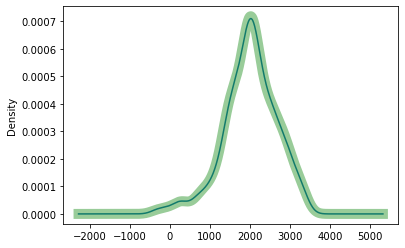

In [7]:
df['p1'] = pred
ax = df['Price'].plot(kind='kde')
df['p1'].plot(kind='kde',ax=ax,alpha=.4,color='green',linewidth=10)

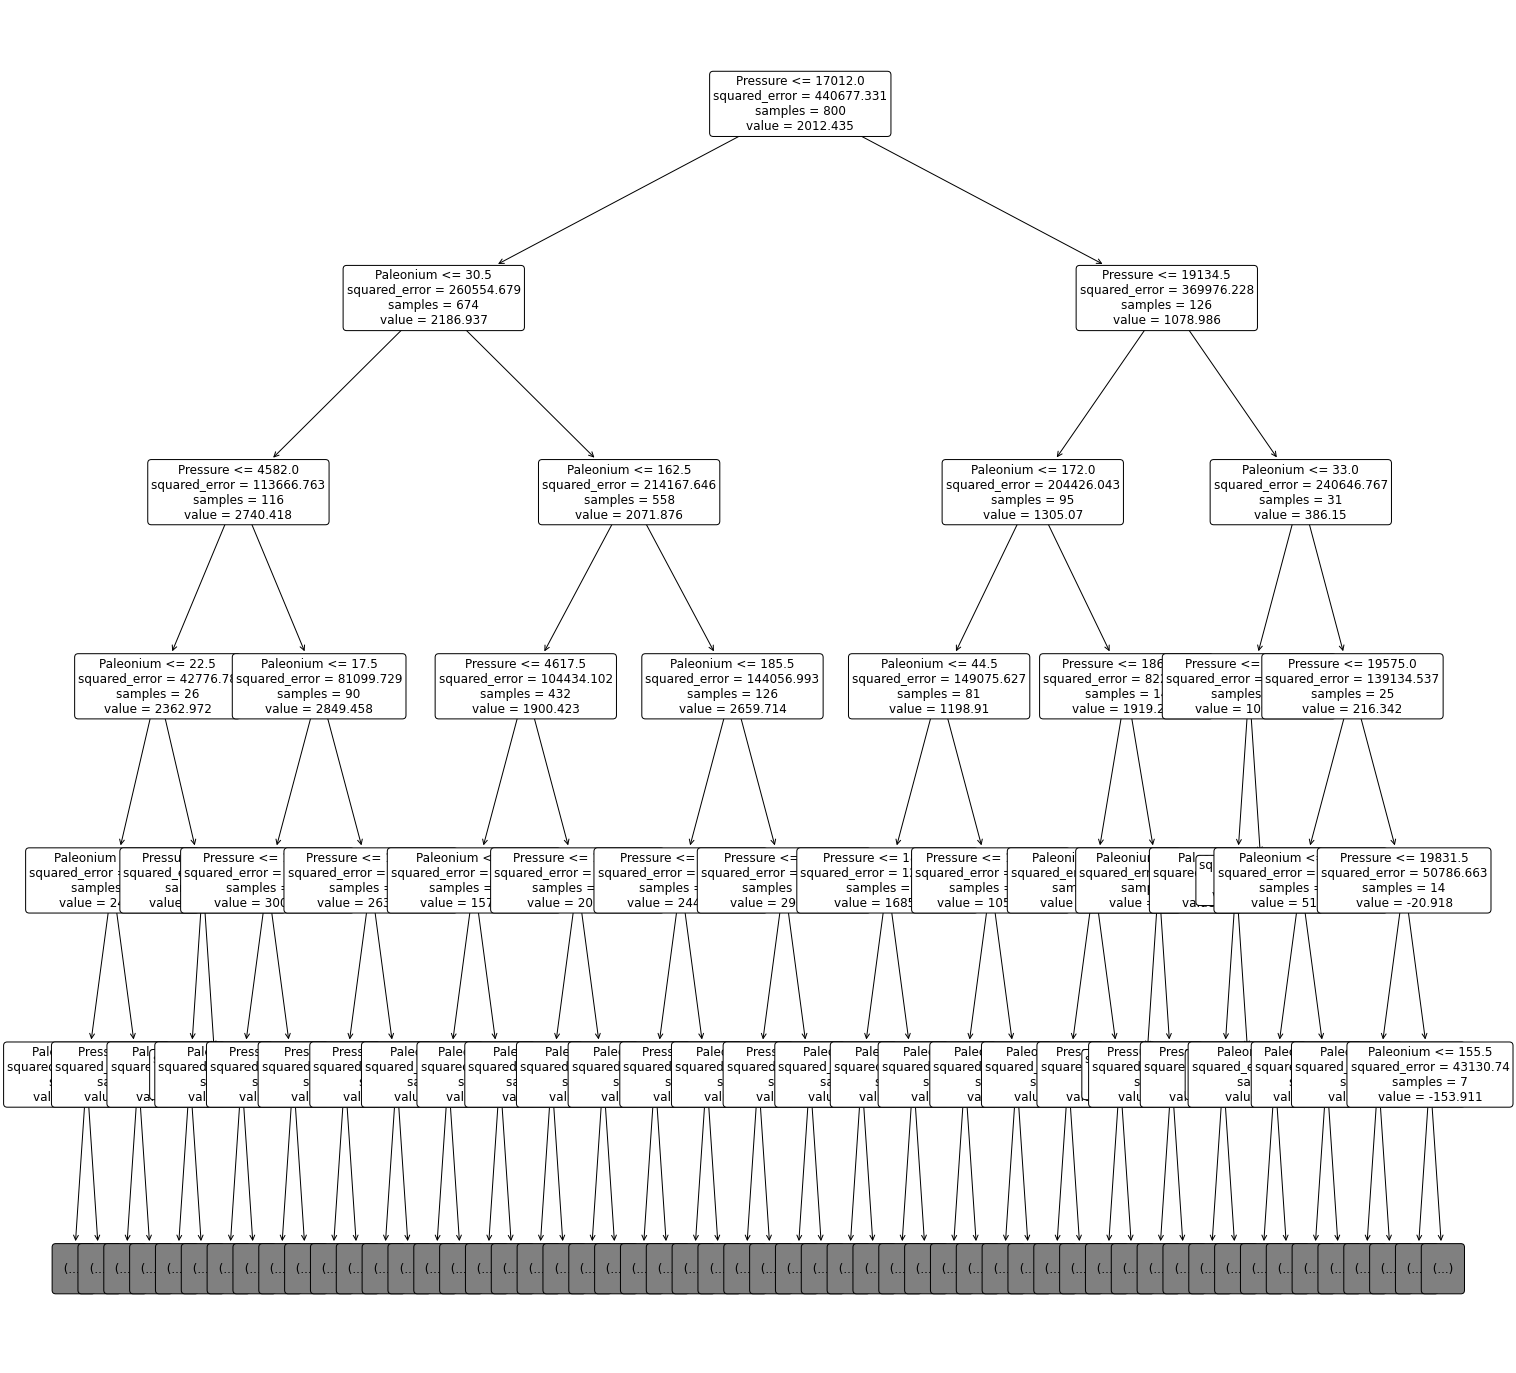

In [8]:
plt.figure(figsize=(25,25))
plot_tree(model,max_depth=5,fontsize=12,feature_names=['Paleonium','Pressure'],rounded=True)
plt.show()

SAVE THE MODEL

In [9]:
dump(model,"basic_diamond_pricing.pkl")

['basic_diamond_pricing.pkl']